# Short term breakout with RSI

## Import Library

In [1]:
import sys
sys.path.append('../../')

In [2]:

from config.constants import *
from backtesting import Backtest
from util.plot_equity import plot_equity_trades
from util.load_data import load_data
from Breakout_RSI import Breakout_RSI
from util.Save_result_return import save_to_csv

## Get Data

In [3]:
XAUUSD = load_data()

In [4]:
XAUUSD['D1'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5043 entries, 2007-01-01 to 2023-03-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5043 non-null   float64
 1   High    5043 non-null   float64
 2   Low     5043 non-null   float64
 3   Close   5043 non-null   float64
 4   Volume  5043 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 236.4 KB


## Define Strategy

In [5]:
strategy = Breakout_RSI

In [6]:
account_size = 10000

# Backtest each time frame

## TF D1

In [7]:
Backtest_D1 = Backtest(XAUUSD['D1'], strategy, cash=account_size, margin=1/100, commission=0.0002 )
result_D1 = Backtest_D1.run()
result_D1

Start                     2007-01-01 00:00:00
End                       2023-03-10 00:00:00
Duration                   5912 days 00:00:00
Exposure Time [%]                    3.648622
Equity Final [$]                  9808.731901
Equity Peak [$]                  10004.081299
Return [%]                          -1.912681
Buy & Hold Return [%]               193.12344
Return (Ann.) [%]                   -0.096456
Volatility (Ann.) [%]                0.262644
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                   -1.952697
Avg. Drawdown [%]                    -0.84529
Max. Drawdown Duration     3881 days 00:00:00
Avg. Drawdown Duration     1946 days 00:00:00
# Trades                                  153
Win Rate [%]                         42.48366
Best Trade [%]                       2.644459
Worst Trade [%]                     -2.611217
Avg. Trade [%]                    

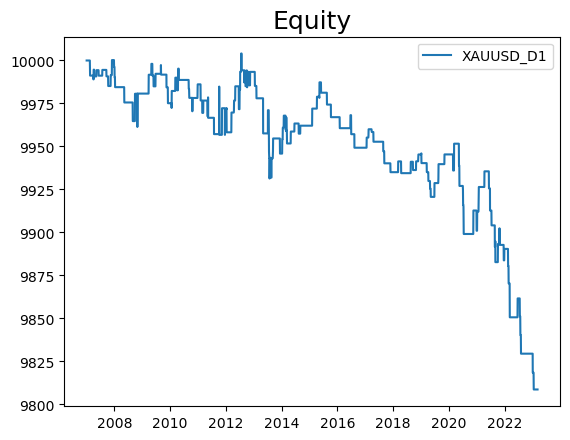

In [8]:
plot_equity_trades(result_D1['_equity_curve'],'XAUUSD_D1' , account_size)

### Save output

In [9]:
save_to_csv(result_D1, '../../out/Technical_Strategy/Breakout_RSI//Backtest/result_D1.csv')  

## TF H4

In [10]:
Backtest_H4 = Backtest(XAUUSD['H4'], strategy,
                       cash=account_size, margin=1/100, commission=0.0002 )
result_H4 = Backtest_H4.run()
result_H4

Start                     2007-01-01 00:00:00
End                       2023-03-10 16:00:00
Duration                   5912 days 16:00:00
Exposure Time [%]                    4.877579
Equity Final [$]                  9487.827439
Equity Peak [$]                  10004.855816
Return [%]                          -5.121726
Buy & Hold Return [%]              193.329158
Return (Ann.) [%]                   -0.262376
Volatility (Ann.) [%]                0.267086
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                   -5.705035
Avg. Drawdown [%]                    -2.86034
Max. Drawdown Duration     5898 days 12:00:00
Avg. Drawdown Duration     2949 days 12:00:00
# Trades                                  794
Win Rate [%]                        44.206549
Best Trade [%]                       0.980448
Worst Trade [%]                     -1.425178
Avg. Trade [%]                    

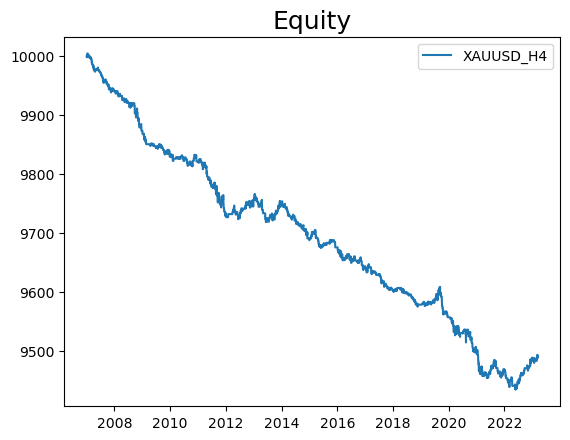

In [11]:
plot_equity_trades(result_H4['_equity_curve'], 'XAUUSD_H4' , account_size)

### Save output

In [12]:
save_to_csv(result_H4, '../../out/Technical_Strategy/Breakout_RSI//Backtest/result_H4.csv')  

## TF H1

In [13]:
Backtest_H1 = Backtest(XAUUSD['H1'], strategy,
                       cash=account_size, margin=1/100, commission=0.0002 )
result_H1 = Backtest_H1.run()
result_H1

Start                     2007-01-01 00:00:00
End                       2023-03-10 17:00:00
Duration                   5912 days 17:00:00
Exposure Time [%]                    5.478082
Equity Final [$]                  9020.249482
Equity Peak [$]                  10001.538199
Return [%]                          -9.797505
Buy & Hold Return [%]               193.27055
Return (Ann.) [%]                   -0.513934
Volatility (Ann.) [%]                0.272551
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                   -9.811378
Avg. Drawdown [%]                   -9.811378
Max. Drawdown Duration     5904 days 12:00:00
Avg. Drawdown Duration     5904 days 12:00:00
# Trades                                 2939
Win Rate [%]                        47.533175
Best Trade [%]                       0.921731
Worst Trade [%]                     -0.791587
Avg. Trade [%]                    

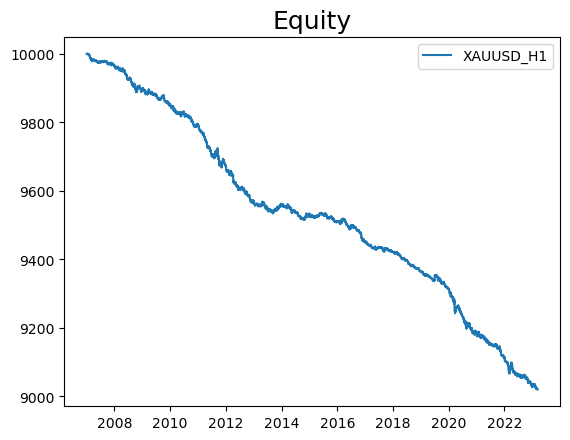

In [14]:
plot_equity_trades(result_H1['_equity_curve'], 'XAUUSD_H1', account_size)

### Save output

In [15]:
save_to_csv(result_H1, '../../out/Technical_Strategy/Breakout_RSI//Backtest/result_H1.csv')  

## TF M30 

In [16]:
Backtest_M30 = Backtest(XAUUSD['M30'], strategy,
                       cash=account_size, margin=1/100, commission=0.0002 )
result_M30 = Backtest_M30.run()
result_M30

Start                     2007-01-01 00:00:00
End                       2023-03-10 17:30:00
Duration                   5912 days 17:30:00
Exposure Time [%]                    5.958399
Equity Final [$]                  7974.441062
Equity Peak [$]                  10001.591562
Return [%]                         -20.255589
Buy & Hold Return [%]              193.338852
Return (Ann.) [%]                   -1.124672
Volatility (Ann.) [%]                0.302263
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -20.268279
Avg. Drawdown [%]                   -6.761901
Max. Drawdown Duration     5907 days 21:30:00
Avg. Drawdown Duration     1969 days 15:30:00
# Trades                                 5973
Win Rate [%]                        46.626486
Best Trade [%]                        0.52874
Worst Trade [%]                      -0.58322
Avg. Trade [%]                    

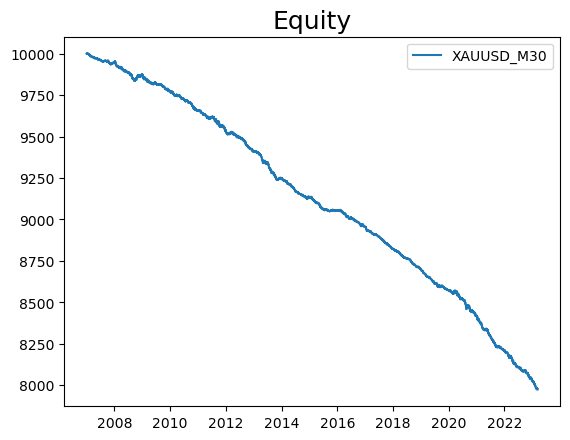

In [17]:
plot_equity_trades(result_M30['_equity_curve'], 'XAUUSD_M30', account_size)

### Save output

In [18]:
save_to_csv(result_M30, '../../out/Technical_Strategy/Breakout_RSI//Backtest/result_M30.csv')  